## Week 8 Assignment: Data Visualization
### using matplotlib and seaborn graphics capabilities

1. load data
2. clean data by replacing '?' horsepower values with NaN and change to numeric values
3. replace origin values: 1='USA' 2='Asia' 3='Europe' 
4. create bar chart for cylinder distribution
5. create scatterplot for horsepower vs. weight
6. ask and answer one additional question about data

First, I will load the data and make sure columns are labeled.

I ended up inserting an index column using a simple function for the index values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/sarahbill33/dataacq/blob/main/auto-mpg.data?raw=true'
autompg = pd.read_csv(url, sep='\s+', index_col=False)
autompg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

indexvalues = []

def createIndex(x):
    r = 1
    while r < (len(x)+1):
        indexvalues.append(r)
        r = r+1

createIndex(autompg)

autompg['index_col'] = indexvalues
autompg = autompg.set_index('index_col')

print(autompg)

            mpg  cylinders  displacement horsepower  weight  acceleration  \
index_col                                                                   
1          15.0          8         350.0      165.0  3693.0          11.5   
2          18.0          8         318.0      150.0  3436.0          11.0   
3          16.0          8         304.0      150.0  3433.0          12.0   
4          17.0          8         302.0      140.0  3449.0          10.5   
5          15.0          8         429.0      198.0  4341.0          10.0   
...         ...        ...           ...        ...     ...           ...   
393        27.0          4         140.0      86.00  2790.0          15.6   
394        44.0          4          97.0      52.00  2130.0          24.6   
395        32.0          4         135.0      84.00  2295.0          11.6   
396        28.0          4         120.0      79.00  2625.0          18.6   
397        31.0          4         119.0      82.00  2720.0          19.4   

Next, I will replace the '?' values in horsepower. I thought about dropping them or filling with '0' but either of those choices would impact the data negatively. So I need to replace them with something, but I was not sure what to use at first.

I started by looking at the data to be replaced.

In [2]:
hpfilter = autompg[autompg['horsepower'] == '?']

print(hpfilter)

            mpg  cylinders  displacement horsepower  weight  acceleration  \
index_col                                                                   
32         25.0          4          98.0          ?  2046.0          19.0   
126        21.0          6         200.0          ?  2875.0          17.0   
330        40.9          4          85.0          ?  1835.0          17.3   
336        23.6          4         140.0          ?  2905.0          14.3   
354        34.5          4         100.0          ?  2320.0          15.8   
374        23.0          4         151.0          ?  3035.0          20.5   

           model year  origin              car name  
index_col                                            
32                 71       1            ford pinto  
126                74       1         ford maverick  
330                80       2  renault lecar deluxe  
336                80       1    ford mustang cobra  
354                81       2           renault 18i  
374  

I see a couple of things here. First, there aren't a lot of '?' values, which means I can try to more accurately replace them.

Second, I see that there are 6 unique car names. I filtered the data to see if these car names existed with non-'?' values in the horsepower column.

In [3]:
cnfilter = autompg[autompg['car name'] == 'ford pinto']

print(cnfilter)

            mpg  cylinders  displacement horsepower  weight  acceleration  \
index_col                                                                   
32         25.0          4          98.0          ?  2046.0          19.0   
112        19.0          4         122.0      85.00  2310.0          18.5   
130        26.0          4         122.0      80.00  2451.0          16.5   
168        23.0          4         140.0      83.00  2639.0          17.0   
174        18.0          6         171.0      97.00  2984.0          14.5   
206        26.5          4         140.0      72.00  2565.0          13.6   

           model year  origin    car name  
index_col                                  
32                 71       1  ford pinto  
112                73       1  ford pinto  
130                74       1  ford pinto  
168                75       1  ford pinto  
174                75       1  ford pinto  
206                76       1  ford pinto  


There are good values for other cars with the same names, so I will use the mean of these values for each of the '?' rows.

Before I replace with the mean, I will need to create a filtered data set because you can't create a mean when non-numeric values are present.

In [4]:
autompg['horsepower'] = autompg['horsepower'].replace(to_replace = '?', value = 0)
autompg['horsepower'] = pd.to_numeric(autompg['horsepower'])
autompgmeans = autompg[autompg.horsepower != '?']

autompg['horsepower'] = autompg['horsepower'].replace(to_replace = 0, value = autompgmeans.loc[autompgmeans['car name'] == 'ford pinto', 'horsepower'].mean())
autompg['horsepower'] = autompg['horsepower'].replace(to_replace = 0, value = autompgmeans.loc[autompgmeans['car name'] == 'ford maverick', 'horsepower'].mean())
autompg['horsepower'] = autompg['horsepower'].replace(to_replace = 0, value = autompgmeans.loc[autompgmeans['car name'] == 'renault lecar deluxe', 'horsepower'].mean())
autompg['horsepower'] = autompg['horsepower'].replace(to_replace = 0, value = autompgmeans.loc[autompgmeans['car name'] == 'ford mustang cobra', 'horsepower'].mean())
autompg['horsepower'] = autompg['horsepower'].replace(to_replace = 0, value = autompgmeans.loc[autompgmeans['car name'] == 'renault 18i', 'horsepower'].mean())
autompg['horsepower'] = autompg['horsepower'].replace(to_replace = 0, value = autompgmeans.loc[autompgmeans['car name'] == 'amc concord dl', 'horsepower'].mean())

hpfilter2 = autompg[autompg['horsepower'] == '?']

print(hpfilter2)

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


After replacing, I checked to see if there are any '?' values, and there are not. Success!

Now I will check one of the original '?' value rows to see what horsepower value was populated.

In [5]:
autompg.loc[[32]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
index_col,,,,,,,,,
32,25.0,4,98.0,69.5,2046.0,19.0,71,1,ford pinto


This looks good.

Now, I can move onto replacing the origin values.

In [6]:
autompg['origin'] = autompg['origin'].replace(to_replace = 1, value = 'USA')
autompg['origin'] = autompg['origin'].replace(to_replace = 2, value = 'Asia')
autompg['origin'] = autompg['origin'].replace(to_replace = 3, value = 'Europe')

print(autompg)

            mpg  cylinders  displacement  horsepower  weight  acceleration  \
index_col                                                                    
1          15.0          8         350.0       165.0  3693.0          11.5   
2          18.0          8         318.0       150.0  3436.0          11.0   
3          16.0          8         304.0       150.0  3433.0          12.0   
4          17.0          8         302.0       140.0  3449.0          10.5   
5          15.0          8         429.0       198.0  4341.0          10.0   
...         ...        ...           ...         ...     ...           ...   
393        27.0          4         140.0        86.0  2790.0          15.6   
394        44.0          4          97.0        52.0  2130.0          24.6   
395        32.0          4         135.0        84.0  2295.0          11.6   
396        28.0          4         120.0        79.0  2625.0          18.6   
397        31.0          4         119.0        82.0  2720.0    

Now for visualization!

I will create the bar chart for cylinder distribution first.

<AxesSubplot:xlabel='index_col'>

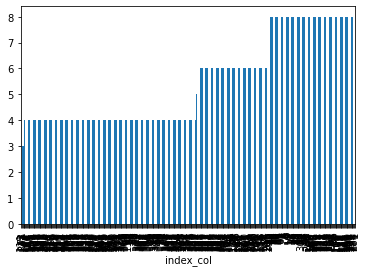

In [7]:
autompg_sorted= autompg.sort_values('cylinders')
autompg_sorted.cylinders.plot(x='cylinders', kind='bar')

I can see now that there are a lot of similar values. I think a box plot might give us a better visualization.

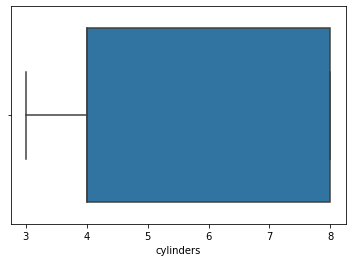

In [11]:
sns.boxplot(data=autompg, x='cylinders')
plt.show()

It looks like there are some outliers causing the upper whisker to disappear, but overall I can see that the middle 50% fall between 4 and 8 cylinders.

Next, I will create the scatter plot with horsepower and weight

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

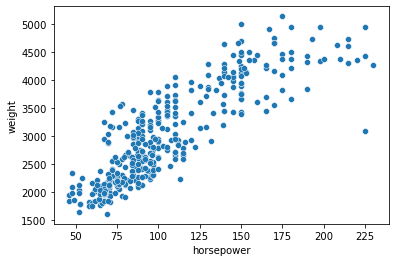

In [12]:
sns.scatterplot(data=autompg, x='horsepower', y='weight')

There is an obvious positive correlation between horsepower and weight.

My own question is: is there a correlation between model year and mpg? My hypothesis is that mpg will go up and model year goes up (positive correlation).

<AxesSubplot:xlabel='model year', ylabel='mpg'>

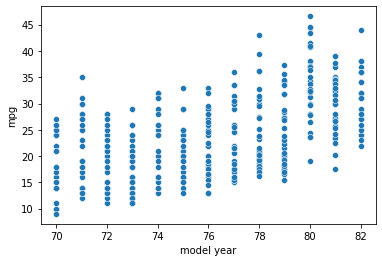

In [13]:
sns.scatterplot(data=autompg, x='model year', y='mpg')

Although there is some variation, overall it appears that mpg does go up throughout the years.